In [28]:
import pandas as pd #used to perform data manipulation and analysis
import numpy as np #used to perform a wide variety of mathematical operations on arrays
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string #used to obtain information in the string and manipulate the string overall
import re #used as a regular expression to find particular patterns and process it
import nltk #a natural language processing toolkit module associated in anaconda
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
import warnings #to manipulate warnings details
nltk.download('stopwords')
nltk.download('wordnet')

warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
df = pd.read_csv('TweetSentimentData.csv', encoding='latin-1')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [30]:
df.columns = ["target","id","date","flag","user","text"]
df

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   id      1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [32]:
df.sort_values("id", axis = 0,inplace = True, na_position ='last')
df

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
799994,0,2329205009,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,dandykim,Sick Spending my day laying in bed listening ...
799995,0,2329205038,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,bigenya,Gmail is down?
799996,0,2329205473,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,LeeLHoke,rest in peace Farrah! So sad
799997,0,2329205574,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,davidlmulder,@Eric_Urbane Sounds like a rival is flagging y...


In [33]:
stop_words = nltk.corpus.stopwords.words('english')


def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove common punctuation as delimiters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Numerical character removal
    text = re.sub('[0-9]+', '', text)
    
    # Remove extra whitespaces
    text = ' '.join(text.split())

    # Removing user@ references and #
    text = re.sub(r'\@\w+|\#\w+', '', text)

    # Tokenization (simple split)
    filtered_list = text.split()

        # Stopword removal
    filtered_list = [word for word in filtered_list if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    filtered_list = [lemmatizer.lemmatize(word) for word in filtered_list]
    
    cleaned_text = " ".join(filtered_list)
    
    
    return cleaned_text

dirty_text = "Hello!   This is an excellent good better example text with some 123 special characters and a URL http://example.com"
cleaned_text = clean_text(dirty_text)

print("Original Text:", dirty_text)
print("Cleaned and Lemmatized Text:", cleaned_text)

Original Text: Hello!   This is an excellent good better example text with some 123 special characters and a URL http://example.com
Cleaned and Lemmatized Text: hello excellent good better example text special character url


In [34]:
df['clean_tweet'] = df['text'].apply(clean_text)
display(df['clean_tweet'])

0         upset cant update facebook texting might cry r...
1         kenichan dived many time ball managed save res...
2                           whole body feel itchy like fire
3                  nationwideclass behaving im mad cant see
4                                       kwesidei whole crew
                                ...                        
799994    sick spending day laying bed listening taylors...
799995                                                gmail
799996                                rest peace farrah sad
799997    ericurbane sound like rival flagging ad much t...
799998    resit exam summer wish worked harder first yea...
Name: clean_tweet, Length: 1599999, dtype: object

In [35]:
X = df['clean_tweet'].values
y = df['target'].values

In [36]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(sublinear_tf=True,ngram_range=(1,2), stop_words = stop_words, strip_accents = 'unicode', max_features = 500000)
X = vector.fit_transform(X)
print(f'Vector fitted.')

Vector fitted.


EDA

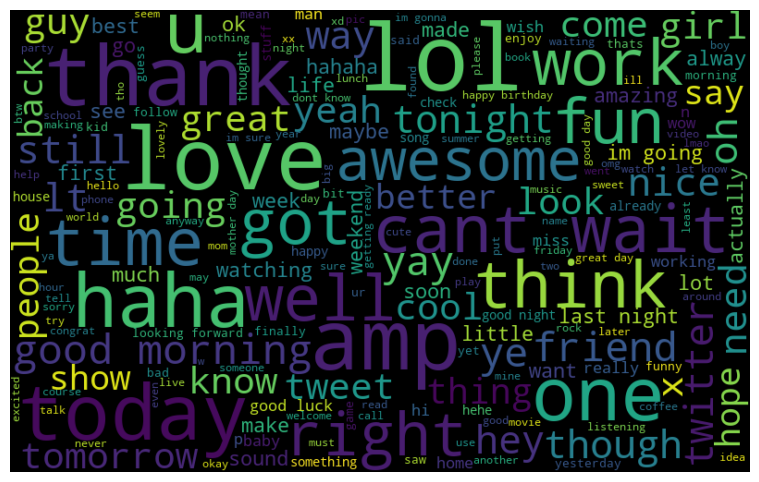

In [37]:
# frequent words visualization for +ve

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['target']==4]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

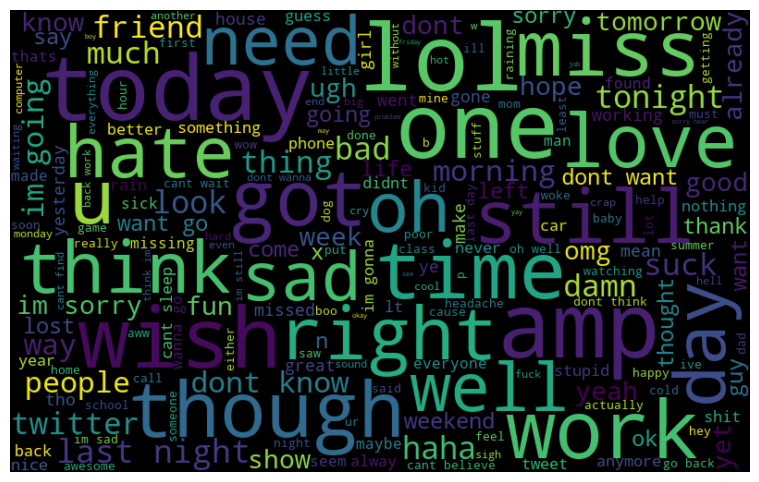

In [38]:
# frequent words visualization for -ve

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['target']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

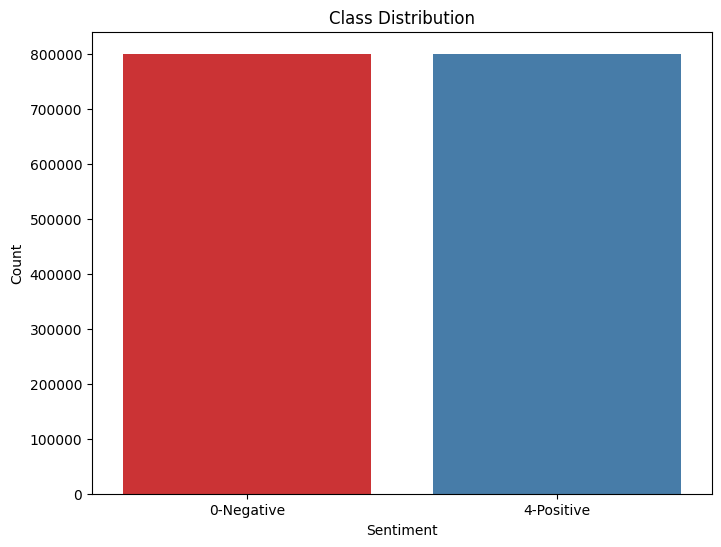

In [39]:
# using a function df.plot.bar() 
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='Set1')
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0-Negative', '4-Positive'])  # Set custom x-axis labels
plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['target_encoded'] = label_encoder.fit_transform(df['target'])
df['target_encoded']

0         0
1         0
2         0
3         0
4         0
         ..
799994    0
799995    0
799996    0
799997    0
799998    0
Name: target_encoded, Length: 1599999, dtype: int64

In [41]:
df['target_encoded'].value_counts()

target_encoded
1    800000
0    799999
Name: count, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.20)

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score


In [44]:
def model_train(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred_tr = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("--------------------Training Performance---------------------")
    print(classification_report(y_train,y_pred_tr))
    print("-------------------------------------------------------------")
    print("--------------------Testing Performance----------------------")
    print(classification_report(y_test,y_pred))

In [45]:
model = MultinomialNB()
model_train(model, x_train, x_test, y_train, y_test)

--------------------Training Performance---------------------
              precision    recall  f1-score   support

           0       0.84      0.84      0.84    639717
           4       0.84      0.84      0.84    640282

    accuracy                           0.84   1279999
   macro avg       0.84      0.84      0.84   1279999
weighted avg       0.84      0.84      0.84   1279999

-------------------------------------------------------------
--------------------Testing Performance----------------------
              precision    recall  f1-score   support

           0       0.79      0.79      0.79    160282
           4       0.78      0.79      0.79    159718

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



In [46]:
model = LogisticRegression()
model_train(model, x_train, x_test, y_train, y_test)

--------------------Training Performance---------------------
              precision    recall  f1-score   support

           0       0.84      0.81      0.82    639717
           4       0.82      0.85      0.83    640282

    accuracy                           0.83   1279999
   macro avg       0.83      0.83      0.83   1279999
weighted avg       0.83      0.83      0.83   1279999

-------------------------------------------------------------
--------------------Testing Performance----------------------
              precision    recall  f1-score   support

           0       0.81      0.78      0.79    160282
           4       0.79      0.82      0.80    159718

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



In [47]:
model = RandomForestClassifier(n_estimators=100,max_depth=1)
model_train(model, x_train, x_test, y_train, y_test)

--------------------Training Performance---------------------
              precision    recall  f1-score   support

           0       0.69      0.15      0.24    639717
           4       0.52      0.94      0.67    640282

    accuracy                           0.54   1279999
   macro avg       0.61      0.54      0.46   1279999
weighted avg       0.61      0.54      0.46   1279999

-------------------------------------------------------------
--------------------Testing Performance----------------------
              precision    recall  f1-score   support

           0       0.69      0.15      0.24    160282
           4       0.52      0.93      0.67    159718

    accuracy                           0.54    320000
   macro avg       0.61      0.54      0.46    320000
weighted avg       0.61      0.54      0.46    320000



In [48]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [49]:
pred = LR.predict(x_test)
accuracy_score(y_test,pred)

0.798884375

In [50]:
f1_score(y_test, pred, pos_label=4)

0.8027667875169706

In [51]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 4
pred = pred.astype(np.int64)

f1_score(y_test, pred,average="micro")

0.50088125

In [52]:
# Use Stratified K-Fold for balanced evaluation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [53]:
from sklearn.model_selection import cross_val_score
for solver in ['lbfgs', 'sag', 'saga']:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for penalty in ['l2']:
            model = LogisticRegression(C=C, penalty=penalty, solver=solver)
            scores = cross_val_score(model, x_test, y_test, cv=kfold, scoring='f1_macro')
            mean_score = scores.mean()
            print(f"C={C}, solver={solver}, penalty={penalty}, F1-macro={mean_score:.4f}")
    print()



C=0.001, solver=lbfgs, penalty=l2, F1-macro=0.7292
C=0.01, solver=lbfgs, penalty=l2, F1-macro=0.7419
C=0.1, solver=lbfgs, penalty=l2, F1-macro=0.7676
C=1, solver=lbfgs, penalty=l2, F1-macro=0.7849
C=10, solver=lbfgs, penalty=l2, F1-macro=0.7761
C=100, solver=lbfgs, penalty=l2, F1-macro=0.7630

C=0.001, solver=sag, penalty=l2, F1-macro=0.7311
C=0.01, solver=sag, penalty=l2, F1-macro=0.7424
C=0.1, solver=sag, penalty=l2, F1-macro=0.7677
C=1, solver=sag, penalty=l2, F1-macro=0.7848
C=10, solver=sag, penalty=l2, F1-macro=0.7744
C=100, solver=sag, penalty=l2, F1-macro=0.7446

C=0.001, solver=saga, penalty=l2, F1-macro=0.7312
C=0.01, solver=saga, penalty=l2, F1-macro=0.7424
C=0.1, solver=saga, penalty=l2, F1-macro=0.7677
C=1, solver=saga, penalty=l2, F1-macro=0.7848
C=10, solver=saga, penalty=l2, F1-macro=0.7745
C=100, solver=saga, penalty=l2, F1-macro=0.7473



Test Model

In [54]:
new_tweet = 'This is a good product'
cleaned_new_tweet = clean_text(new_tweet)
vect_tweet = vector.transform([cleaned_new_tweet])
prediction = LR.predict(vect_tweet)
print('Predicted Sentiment for the new tweet:', 'Positive' if prediction[0] == 4 else 'Negative')

Predicted Sentiment for the new tweet: Positive
